In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
import time

In [4]:
# sampling x 
x1 = np.random.normal(3 , 2, (1000000,) ) 
x2 = np.random.normal(-1, 2 , (1000000,)) 
x = np.zeros((1000000, 3)) 

x[:, 0] = 1 # adding intercept term 
x[:, 1] = x1 
x[:, 2] = x2 
# print(np.var(x[:, 1]))  

# sampling y 

original_hypothesis = np.array([3,1,2]) 
y = np.matmul(x, original_hypothesis) 
y += np.random.normal(0, math.sqrt(2) , y.shape)  



In [5]:
def compute_batch_error(X, Y, theta, batch_size, batch_number):
    X_batch = X[batch_size  * (batch_number - 1)   : batch_size * (batch_number - 1) + batch_size, :] 
    Y_batch = Y[ batch_size  * (batch_number - 1)   : batch_size * (batch_number - 1) + batch_size] 

    Z = Y_batch - np.matmul(X_batch, theta)
    error = np.matmul(np.transpose(Z), Z) / (2 * batch_size) 
    return error  

In [6]:
def compute_batch_gradient(X, Y, theta, batch_size, batch_number):
    X_batch = X[batch_size  * (batch_number - 1)   : batch_size * (batch_number - 1) + batch_size, :] 
    Y_batch = Y[ batch_size  * (batch_number - 1)   : batch_size * (batch_number - 1) + batch_size] 
    Z_batch = Y_batch - np.matmul(X_batch, theta) 
    # print(Z)
    gradient = np.zeros(theta.size) 
    for j in range(theta.size):
        X_j = X_batch[:, j] 
        gradient[j] = np.sum(Z_batch * X_j)/ batch_size 
    return gradient

In [7]:
def compute_error(X, Y, hypothesis):
    Z = (Y - np.matmul(X, hypothesis)) 
    m = Y.size 
    error = np.matmul(np.transpose(Z), Z)/ (2 * m) 
    return error 


[[ 5  6 10]
 [ 1  2  3]
 [ 3  4  5]]


In [9]:
def minibatch_v2(X, Y, batch_size, k, gamma, epsilon):
    Z = np.zeros((Y.shape[0], X.shape[1] + 1)) 
    for i in range(X.shape[1]):
        Z[:, i] = X[:, i] 
    Z[:, X.shape[1]] = Y 
    np.random.shuffle(Z) 

    X = Z[:, 0:3] 
    Y = Z[:, 3]   
    # here i compute difference of two consecutive sets of k iterations 
    current_batch_number = 1  
    theta = np.zeros(X[0].size) 
    initial_error = compute_error(X, Y, theta) 
    # epsilon = 0.000001 * initial_error  
    # epsilon = 1e-6 if (batch_size > int(math.sqrt(Y.size))) else 5e-5 
    
    # print(f"epsilon is {epsilon}")
    
    learning_parameter = 0.001
    MOD = Y.size / batch_size 
    no_of_iterations = 0 

    previous_avg_error = 0 
    avg_error = 0 
    last_count = 0 
    
    max_count = max(1e4, 100 * MOD) 
    point_list = [] 
    # print(max_count) 
    while (True):
        previous_avg_error = avg_error 
        avg_error = 0 
        for i in range(k):
            grad = compute_batch_gradient(X, Y, theta, batch_size, int(current_batch_number) ) 
            theta = theta + learning_parameter * grad  
            point_list.append(theta) 
            curr_error = compute_batch_error(X, Y, theta, batch_size, int(current_batch_number))  
            avg_error += curr_error  
            no_of_iterations += 1 
            current_batch_number = (current_batch_number + 1) 
            if (current_batch_number > MOD):  current_batch_number -= MOD 
        avg_error /= k         
        # print(f"theta : {theta}") 
        # print(f"avg_error last_count {avg_error} {last_count} ")
        if (abs(avg_error - previous_avg_error) <  epsilon): last_count += 1 
        else : last_count = 0 
        if (last_count >= gamma or no_of_iterations > max_count): break 
    
    print(f"no of iterations is {no_of_iterations}") 
    print(f"learned theta is {theta}") 
    return (theta, point_list)
    

In [10]:
test_set = pd.read_csv("./ass1_data/data/q2/q2test.csv") 
test_set = test_set.to_numpy() 
temp = np.zeros((10000, 4)) 
temp[:,0] = 1 
temp[:, 1] = test_set[:, 0] 
temp[:, 2] = test_set[:, 1] 
temp[:, 3] = test_set[:, 2]

test_set = temp 


test_input = test_set[:, 0 : 3] 
test_output = test_set[:, 3] 

start1 = time.time() 
(model1, list1) = minibatch_v2(x, y, 1, 10, 1, 1e-4) 
error1 = compute_error(test_input, test_output, model1) 
print(f"model1  error1  {model1}  | {error1}")
end1 = time.time() 
print(f"time taken is {end1 - start1}s\n") 


start2 = time.time() 
(model2, list2) = minibatch_v2(x, y, 100, 40 , 1, 8e-5) 
error2 = compute_error(test_input, test_output, model2) 
print(f"model2  error2  {model2}  | {error2}")
end2 = time.time() 
print(f"time taken is {end2 - start2}s\n") 


start3 = time.time() 

(model3, list3) = minibatch_v2(x, y, 10000, 10 ,1, 1e-6) 
error3 = compute_error(test_input, test_output, model3) 
print(f"model3  error3  {model3}  | {error3}")
end3 = time.time() 
print(f"time taken is {end3 - start3}s\n") 


start4 = time.time() 

(model4, list4) = minibatch_v2(x, y, 1000000, 1, 1, 1e-6) 
error4 = compute_error(test_input, test_output, model4) 
print(f"model4  error4  {model4}  | {error4}")
end4 = time.time() 
print(f"time taken is {end4 - start4}s\n") 


100000000.0
no of iterations is 7610
learned theta is [2.6408615  1.11662396 1.98702759]
model1  error1  [2.6408615  1.11662396 1.98702759]  | 1.6909009368181462
time taken is 1.398885726928711s

1000000.0
no of iterations is 14800
learned theta is [2.95102868 1.0142031  1.9968381 ]
model2  error2  [2.95102868 1.0142031  1.9968381 ]  | 0.9938325450337863
time taken is 1.5969905853271484s

10000.0
no of iterations is 10010
learned theta is [2.81711008 1.04066065 1.98715672]
model3  error3  [2.81711008 1.04066065 1.98715672]  | 1.0819055373164015
time taken is 2.802152395248413s

10000.0
no of iterations is 10001
learned theta is [2.81663087 1.04053813 1.98715045]
model4  error4  [2.81663087 1.04053813 1.98715045]  | 1.0815016228009813
time taken is 413.95349764823914s



In [11]:


og_error1 = compute_error(test_input, test_output, original_hypothesis) 
print(error1, error2, error3, error4, model1, model2, model3, model4) 
print("error wrt original model") 
print(og_error1) 


1.6909009368181462 0.9938325450337863 1.0819055373164015 1.0815016228009813 [2.6408615  1.11662396 1.98702759] [2.95102868 1.0142031  1.9968381 ] [2.81711008 1.04066065 1.98715672] [2.81663087 1.04053813 1.98715045]
error wrt original model
0.9829469215


In [14]:
def plot_theta_movement(plot_list):
    plot_list = np.array(plot_list) 
    x = plot_list[:,0] 
    y = plot_list[:, 1] 
    z = plot_list[:, 2] 
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z) 

    ax.set_xlabel('Theta0')
    ax.set_ylabel('Theta1')
    ax.set_zlabel('Theta2') 

    ax.set_title('Movement of Theta') 
    plt.show()


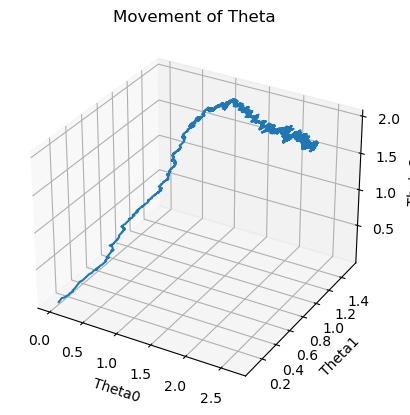

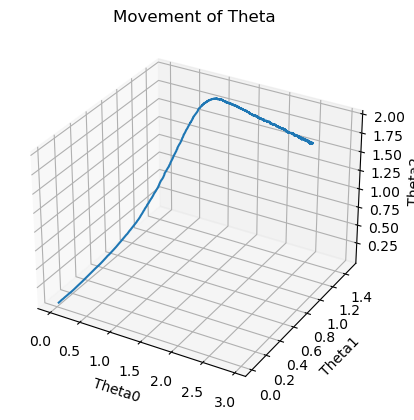

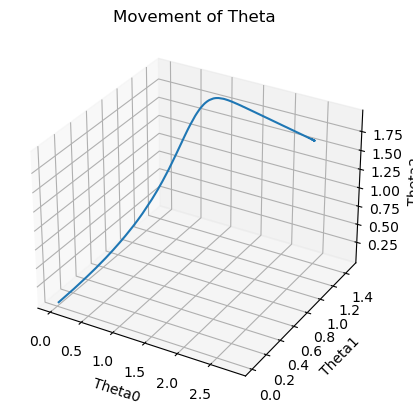

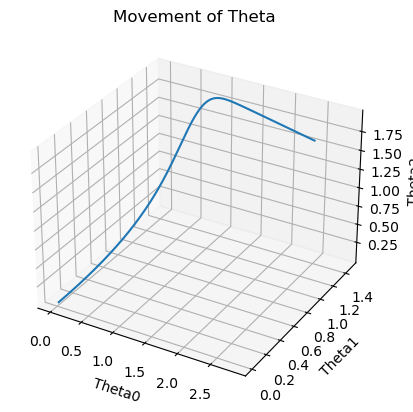

In [15]:
plot_theta_movement(list1)
plot_theta_movement(list2)
plot_theta_movement(list3)
plot_theta_movement(list4)

## Comments- 
1. We observe that the different algorithms converge to observably different values of theta, depending on the convergence criteria, and the batch size.  
2. The relative difference between the learned parameters and the original hypothesis, are 
 (% diff between thetas) 
3. We observe that the no of iterations taken decreases as we increase the batch size, although the total time taken increases with increasing batch size. This can be rationalised by the following argument-
    The noise in the trajectory of theta is more for less batch sizes, thus they require more iterations to converge, however as the time needed for one iteration is also less for small batch sizes (one iteration means updating parameters using 1 batch), the overall time decreases with increasing batch size. Thus the speed of convergence is more for smaller batch sizes, as time taken is less to converge and the parameters update more frequently, but the no of iterations is also more for the smaller batch sizes. 

4. We observe that errors (rms) for increasing batch sizes are 1.27, 0.99, 1.08, 1.08; whereas the error wrt the original hypothesis is 0.98 . Thus we observe that the percentage errors are approximately(wrt original error) 30%, 1%, 10%, 10%. Thus we observe that from a perspective of both performance and accuracy, batch size = 100 performs the most optimally. The maximum error is for batch size = 1 (SGD), this can be attributed to the noisy path taken in case of SGD. Also we observe that for cases of batch size = 1e4 and 1e6, the convergence is due to early stopping by capping the maximum number of iterations. This was done as a tradeoff between performance and accuracy. 

5. We observe that as we vary batch size, the noisiness of the path of movement of theta decreases with increasing batch size. It is the most noisy for batch size = 1 (SGD) and least for batch gradient descent. 
This makes intuitive sense also, as we know that in case of SGD we update the parameters on basis of gradient of error in only 1 test input. As the test inputs can be individually scattered due to their variance, the path taken by theta can be very different from that towards the convergent theta ([3,1,2]) in this case. However as we increase the batch size, the variance in the gradient reduces as more test inputs are used, and thus theta starts changing more towards the convergent theta, and the noise in the path reduces.  